In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
pew = pd.read_csv('/home/sha/books/pandas_for_everyone/data/pew.csv')

In [4]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [5]:
pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [6]:
pew_long = pew.melt(id_vars='religion')

In [7]:
pew_long

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [8]:
pew_long = pew.melt(id_vars='religion', var_name='income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [9]:
billboard = pd.read_csv('/home/sha/books/pandas_for_everyone/data/billboard.csv')

In [10]:
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
billboard_long = billboard.melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')

In [12]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [13]:
ebola = pd.read_csv('/home/sha/books/pandas_for_everyone/data/country_timeseries.csv')

In [14]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ebola.describe()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
count,122.000000,93.000000,83.000000,87.000000,38.000000,25.00,18.000000,16.0,12.000000,92.000000,81.000000,87.000000,38.000000,22.0,18.000000,16.000000,12.000000
mean,144.778689,911.064516,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.500000,563.239130,1101.209877,693.701149,6.131579,0.0,0.833333,0.187500,3.166667
std,89.316460,849.108801,2987.966721,3184.803996,5.998577,0.40,1.178511,0.0,2.746899,508.511345,1297.208568,869.947073,2.781901,0.0,0.383482,0.403113,2.405801
min,0.000000,49.000000,3.000000,0.000000,0.000000,1.00,1.000000,1.0,1.000000,29.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,66.250000,236.000000,25.500000,64.500000,15.000000,1.00,3.000000,1.0,1.000000,157.750000,12.000000,6.000000,4.000000,0.0,1.000000,0.000000,1.000000
50%,150.000000,495.000000,516.000000,783.000000,20.000000,1.00,4.000000,1.0,2.500000,360.500000,294.000000,334.000000,8.000000,0.0,1.000000,0.000000,2.000000
75%,219.500000,1519.000000,4162.500000,3801.000000,20.000000,1.00,4.000000,1.0,6.250000,847.750000,2413.000000,1176.000000,8.000000,0.0,1.000000,0.000000,6.000000
max,289.000000,2776.000000,8166.000000,10030.000000,22.000000,3.00,4.000000,1.0,7.000000,1786.000000,3496.000000,2977.000000,8.000000,0.0,1.000000,1.000000,6.000000


In [16]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [17]:
ebola_long = ebola.melt(id_vars=['Date', 'Day'])
ebola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [18]:
variable_split = ebola_long.variable.str.split('_')
variable_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [19]:
type(variable_split)

pandas.core.series.Series

In [20]:
type(variable_split[0])

list

In [21]:
status_values = variable_split.str.get(0)
status_values

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [22]:
country_values = variable_split.str.get(1)
country_values

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [23]:
ebola_long['status'] = status_values
ebola_long['country'] = country_values

In [24]:
ebola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [25]:
ebola_long = ebola.melt(id_vars=['Date', 'Day'])
variable_split = ebola_long.variable.str.split('_', expand=True)
variable_split

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [26]:
ebola_long[['status', 'country']] = variable_split
ebola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [27]:
weather = pd.read_csv('/home/sha/books/pandas_for_everyone/data/weather.csv')

In [28]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       22 non-null     object 
 1   year     22 non-null     int64  
 2   month    22 non-null     int64  
 3   element  22 non-null     object 
 4   d1       2 non-null      float64
 5   d2       4 non-null      float64
 6   d3       4 non-null      float64
 7   d4       2 non-null      float64
 8   d5       8 non-null      float64
 9   d6       2 non-null      float64
 10  d7       2 non-null      float64
 11  d8       2 non-null      float64
 12  d9       0 non-null      float64
 13  d10      2 non-null      float64
 14  d11      2 non-null      float64
 15  d12      0 non-null      float64
 16  d13      2 non-null      float64
 17  d14      4 non-null      float64
 18  d15      2 non-null      float64
 19  d16      2 non-null      float64
 20  d17      2 non-null      float64
 21  d18      0 non-nul

In [29]:
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [30]:
weather_melt = weather.melt(id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='temp',)

In [31]:
weather_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [32]:
weather_tidy = weather_melt.pivot_table(index=['id', 'year', 'month', 'day'], columns='element', values='temp')
weather_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [33]:
weather_tidy_flat = weather_tidy.reset_index()
weather_tidy_flat

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [34]:
weather_tidy = (
    weather_melt.pivot_table(
        index=['id', 'year', 'month', 'day'],
        columns='element',
        values='temp'
    ).reset_index()
)
weather_tidy

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [35]:
def sq(x):
    return x ** 2

def avg(x, y):
    return (x + y) / 2

In [36]:
df = pd.DataFrame({'a': [10, 20, 30], 'b': [20, 30, 40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [37]:
df['a'] ** 2

0    100
1    400
2    900
Name: a, dtype: int64

In [38]:
df['a'].apply(sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [39]:
def exp(x, e):
    return x ** e

In [40]:
cubed = exp(2, 3)
cubed

8

In [41]:
df['a'].apply(exp, e=2)

0    100
1    400
2    900
Name: a, dtype: int64

In [42]:
df['a'].apply(exp, e=3)

0     1000
1     8000
2    27000
Name: a, dtype: int64

In [43]:
def avg3_apply(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x + y +z) / 3

In [44]:
df.apply(avg3_apply)

a    20.0
b    30.0
dtype: float64

In [45]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [46]:
def avg2_apply(row):
    x = row[0]
    y = row[1]
    return (x + y) / 2

In [47]:
df.apply(avg2_apply, axis=0)

a    15.0
b    25.0
dtype: float64

In [48]:
def avg2(x, y):
    return (x + y) / 2

In [49]:
avg2(df['a'], df['b'])

0    15.0
1    25.0
2    35.0
dtype: float64

In [50]:
def avg2_mod(x, y):
    if (x == 20):
        return np.NaN
    else:
        return (x + y) / 2

In [51]:
avg2_mod(df['a'], df['b'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [52]:
avg2_mod_vec = np.vectorize(avg2_mod)
avg2_mod_vec(df['a'], df['b'])

array([15., nan, 35.])

In [53]:
import numba

In [54]:
@numba.vectorize
def v_avg2_numba(x, y):
    if (int(x) == 20):
        return (np.NaN)
    else:
        return (x + y) / 2

In [55]:
v_avg2_numba(df['a'], df['b'])

ValueError: [1mCannot determine Numba type of <class 'pandas.core.series.Series'>[0m

In [56]:
v_avg2_numba(df['a'].values, df['b'].values)

array([15., nan, 35.])

In [57]:
df1 = pd.read_csv('/home/sha/books/pandas_for_everyone/data/concat_1.csv')
df2 = pd.read_csv('/home/sha/books/pandas_for_everyone/data/concat_2.csv')
df3 = pd.read_csv('/home/sha/books/pandas_for_everyone/data/concat_3.csv')

In [58]:
row_concat = pd.concat([df1, df2, df3])
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [59]:
row_concat_i = pd.concat([df1, df2, df3], ignore_index=True)
row_concat_i

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [60]:
col_concat = pd.concat([df1, df2, df3], axis='columns')
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [61]:
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [62]:
col_concat['new_col_list'] = ['n1', 'n2', 'n3', 'n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col_list
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [63]:
col_concat['new_col_series'] = pd.Series(['n1', 'n2', 'n3', 'n4'])
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col_list,new_col_series
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4,n4


In [64]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [65]:
row_concat = pd.concat([df1, df2, df3])
row_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [66]:
df1.index = [0, 1, 2, 3]
df2.index = [4, 5, 6, 7]
df3.index = [0, 2, 5, 7]

In [67]:
col_concat = pd.concat([df1, df2, df3], axis='columns')
col_concat

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a10,b10,c10,d10
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,a11,b11,c11,d11


In [69]:
from pathlib import Path

In [73]:
billboard_data_files = (
    Path("/home/sha/books/pandas_for_everyone/").glob("data/billboard-*.csv")
)

In [74]:
billboard_data_files

<generator object Path.glob at 0x7f913e279380>

In [75]:
billboard_data_files = sorted(list(billboard_data_files))
billboard_data_files

[]

In [76]:
person = pd.read_csv('/home/sha/books/pandas_for_everyone/data/survey_person.csv')
site = pd.read_csv('/home/sha/books/pandas_for_everyone/data/survey_site.csv')
survey = pd.read_csv('/home/sha/books/pandas_for_everyone/data/survey_survey.csv')
visited = pd.read_csv('/home/sha/books/pandas_for_everyone/data/survey_visited.csv')

In [77]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [78]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [79]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [80]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [81]:
visited['site'].value_counts()

site
DR-3     4
DR-1     3
MSK-4    1
Name: count, dtype: int64

In [82]:
o2o_merge = site.merge(visited, left_on='name', right_on='site')
o2o_merge

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [83]:
ps = person.merge(survey, left_on='ident', right_on='person')
vs = visited.merge(survey, left_on='ident', right_on='taken')
ps

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [84]:
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [85]:
ps['quant'].value_counts()

quant
rad     8
sal     8
temp    3
Name: count, dtype: int64

In [86]:
vs['quant'].value_counts()

quant
sal     9
rad     8
temp    4
Name: count, dtype: int64

In [87]:
ps_vs = ps.merge(vs, left_on=['quant'], right_on=['quant'],)

In [88]:
ps_vs

,ident_x,personal,family,taken_x,person_x,quant,reading_x,ident_y,site,dated,taken_y,person_y,reading_y
0,dyer,William,Dyer,619,dyer,rad,9.82,619,DR-1,1927-02-08,619,dyer,9.82
1,dyer,William,Dyer,619,dyer,rad,9.82,622,DR-1,1927-02-10,622,dyer,7.80
2,dyer,William,Dyer,619,dyer,rad,9.82,734,DR-3,1939-01-07,734,pb,8.41
3,dyer,William,Dyer,619,dyer,rad,9.82,735,DR-3,1930-01-12,735,pb,7.22
4,dyer,William,Dyer,619,dyer,rad,9.82,751,DR-3,1930-02-26,751,pb,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,pb,Frank,Pabodie,751,pb,temp,-18.50,752,DR-3,NaN,752,lake,-16.00
144,lake,Anderson,Lake,752,lake,temp,-16.00,734,DR-3,1939-01-07,734,pb,-21.50
145,lake,Anderson,Lake,752,lake,temp,-16.00,735,DR-3,1930-01-12,735,NaN,-26.00
146,lake,Anderson,Lake,752,lake,temp,-16.00,751,DR-3,1930-02-26,751,pb,-18.50


In [89]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [90]:
billboard_long.loc[billboard_long.track == 'Loser']

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
...,...,...,...,...,...,...,...
22510,2000,3 Doors Down,Loser,4:24,2000-10-21,wk72,NaN
22827,2000,3 Doors Down,Loser,4:24,2000-10-21,wk73,NaN
23144,2000,3 Doors Down,Loser,4:24,2000-10-21,wk74,NaN
23461,2000,3 Doors Down,Loser,4:24,2000-10-21,wk75,NaN


In [91]:
billboard_songs = billboard_long[['year', 'artist', 'track', 'time']]

In [92]:
billboard_songs.shape

(24092, 4)

In [93]:
billboard_songs = billboard_songs.drop_duplicates()
billboard_songs.shape

(317, 4)

In [96]:
billboard_songs.loc[:, 'id'] = billboard_songs.index + 1

In [97]:
billboard_songs

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2
2,2000,3 Doors Down,Kryptonite,3:53,3
3,2000,3 Doors Down,Loser,4:24,4
4,2000,504 Boyz,Wobble Wobble,3:35,5
...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,313
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,314
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,315
315,2000,Zombie Nation,Kernkraft 400,3:30,316


In [98]:
billboard_ratings = billboard_long.merge(billboard_songs, on=['year', 'artist', 'track', 'time'])
billboard_ratings

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,1
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,1
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,1
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,1
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,1
...,...,...,...,...,...,...,...,...
24087,2000,matchbox twenty,Bent,4:12,2000-04-29,wk72,NaN,317
24088,2000,matchbox twenty,Bent,4:12,2000-04-29,wk73,NaN,317
24089,2000,matchbox twenty,Bent,4:12,2000-04-29,wk74,NaN,317
24090,2000,matchbox twenty,Bent,4:12,2000-04-29,wk75,NaN,317


In [99]:
billboard_ratings = billboard_ratings[['id', 'date.entered', 'week', 'rating']]
billboard_ratings

,id,date.entered,week,rating
0,1,2000-02-26,wk1,87.0
1,1,2000-02-26,wk2,82.0
2,1,2000-02-26,wk3,72.0
3,1,2000-02-26,wk4,77.0
4,1,2000-02-26,wk5,87.0
...,...,...,...,...
24087,317,2000-04-29,wk72,NaN
24088,317,2000-04-29,wk73,NaN
24089,317,2000-04-29,wk74,NaN
24090,317,2000-04-29,wk75,NaN


In [100]:
gapminder = pd.read_csv('/home/sha/books/pandas_for_everyone/data/gapminder.tsv', sep='\t')

In [101]:
avg_life_exp_by_year = gapminder.groupby('year')['lifeExp'].mean()

In [102]:
avg_life_exp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [103]:
y1952 = gapminder.loc[gapminder.year == 1952, :]

In [104]:
y1952

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,Asia,1952,40.412,26246839,605.066492
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
1668,"Yemen, Rep.",Asia,1952,32.548,4963829,781.717576
1680,Zambia,Africa,1952,42.038,2672000,1147.388831


In [105]:
continent_describe = gapminder.groupby('continent')['lifeExp'].describe()
continent_describe

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


In [106]:
gapminder.groupby('continent')['lifeExp'].agg(np.mean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [107]:
def my_mean(values):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    return sum / n

In [108]:
agg_my_mean = gapminder.groupby('year')['lifeExp'].agg(my_mean)
agg_my_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [109]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [110]:
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum / n
    return (mean - diff_value)

In [111]:
global_mean = gapminder['lifeExp'].mean()
global_mean

59.474439366197174

In [112]:
agg_mean_diff = (
    gapminder.groupby('year')['lifeExp']
    .agg(my_mean_diff, diff_value=global_mean)
)
agg_mean_diff

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [114]:
gdf = (
    gapminder.groupby('year')['lifeExp']
    .agg([np.count_nonzero, np.mean, np.std])
)
gdf

,count_nonzero,mean,std
year,,,
1952,142,49.057620,12.225956
1957,142,51.507401,12.231286
1962,142,53.609249,12.097245
1967,142,55.678290,11.718858
1972,142,57.647386,11.381953
1977,142,59.570157,11.227229
1982,142,61.533197,10.770618
1987,142,63.212613,10.556285
1992,142,64.160338,11.227380


In [115]:
gdf_dict = gapminder.groupby('year').agg(
    {
        'lifeExp': 'mean',
        'pop': 'median',
        'gdpPercap': 'median'
    }
)
gdf_dict

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334740
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


In [116]:
gdf = (
    gapminder.groupby('year')['lifeExp'].agg(
        [np.count_nonzero, np.mean, np.std]
    ).rename(
        columns={
            'count_nonzero': 'count',
            'mean': 'avg',
            'std': 'std_dev',
        }
    ).reset_index()
)
gdf

,year,count,avg,std_dev
0,1952,142,49.057620,12.225956
1,1957,142,51.507401,12.231286
2,1962,142,53.609249,12.097245
3,1967,142,55.678290,11.718858
4,1972,142,57.647386,11.381953
5,1977,142,59.570157,11.227229
6,1982,142,61.533197,10.770618
7,1987,142,63.212613,10.556285
8,1992,142,64.160338,11.227380
9,1997,142,65.014676,11.559439


In [117]:
def my_zscore(x):
    return ((x - x.mean()) / x.std())

In [118]:
transform_z = gapminder.groupby('year')['lifeExp'].transform(my_zscore)
transform_z

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64

In [119]:
import seaborn as sns

In [120]:
tips = sns.load_dataset('tips')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [121]:
tips['sex_str'] = tips['sex'].astype(str)
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [122]:
tips

,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male
242,17.82,1.75,Male,No,Sat,Dinner,2,Male


In [123]:
tips['total_bill_str'] = tips['total_bill'].astype(str)
tips

,total_bill,tip,sex,smoker,day,time,size,sex_str,total_bill_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,24.59
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,Male,17.82


In [124]:
tips['total_bill_float'] = tips['total_bill'].astype(float)
tips

,total_bill,tip,sex,smoker,day,time,size,sex_str,total_bill_str,total_bill_float
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,24.59,24.59
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male,29.03,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female,27.18,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male,22.67,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,Male,17.82,17.82


In [126]:
pd.to_numeric(tips['total_bill_str'])

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill_str, Length: 244, dtype: float64

In [127]:
tips['total_bill_num'] = pd.to_numeric(tips['total_bill'], errors='coerce')
tips

,total_bill,tip,sex,smoker,day,time,size,sex_str,total_bill_str,total_bill_float,total_bill_num
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,21.01,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,23.68,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,24.59,24.59,24.59
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male,29.03,29.03,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female,27.18,27.18,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male,22.67,22.67,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,Male,17.82,17.82,17.82


In [128]:
tips['sex'] = tips['sex'].astype('category')
tips

,total_bill,tip,sex,smoker,day,time,size,sex_str,total_bill_str,total_bill_float,total_bill_num
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,21.01,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,23.68,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,24.59,24.59,24.59
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male,29.03,29.03,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female,27.18,27.18,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male,22.67,22.67,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,Male,17.82,17.82,17.82


In [129]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   total_bill        244 non-null    float64 
 1   tip               244 non-null    float64 
 2   sex               244 non-null    category
 3   smoker            244 non-null    category
 4   day               244 non-null    category
 5   time              244 non-null    category
 6   size              244 non-null    int64   
 7   sex_str           244 non-null    object  
 8   total_bill_str    244 non-null    object  
 9   total_bill_float  244 non-null    float64 
 10  total_bill_num    244 non-null    float64 
dtypes: category(4), float64(4), int64(1), object(2)
memory usage: 15.0+ KB


In [131]:
tips.sex.ordered

AttributeError: 'Series' object has no attribute 'ordered'

In [133]:
banks = pd.read_csv('/home/sha/books/pandas_for_everyone/data/banklist.csv', parse_dates=['Closing Date', 'Updated Date'])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


/tmp/ipykernel_21391/88784920.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/home/sha/books/pandas_for_everyone/data/banklist.csv', parse_dates=['Closing Date', 'Updated Date'])
/tmp/ipykernel_21391/88784920.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/home/sha/books/pandas_for_everyone/data/banklist.csv', parse_dates=['Closing Date', 'Updated Date'])


In [134]:
banks = banks.assign(
    closing_quarter=banks['Closing Date'].dt.quarter,
    closing_year=banks['Closing Date'].dt.year
)

In [135]:
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017
...,...,...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19,3,2001
549,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18,2,2001
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18,1,2001
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17,4,2000


In [136]:
banks.groupby(['closing_year']).size()

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64

In [137]:
banks.groupby(['closing_year', 'closing_quarter']).size()

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

In [138]:
import pandas_datareader.data as web

In [140]:
tesla = web.DataReader('TSLA', 'yahoo')
tesla

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/TSLA/history?period1=1534708800&period2=1692475199&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n<html lang="zh">\n<head>\n    <meta charset="utf-8">\n    <title>Yahoo</title>\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <style>\nhtml {\n  height: 100%;\n}\nbody {\n  background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n  background-size: cover;\n  height: 100%;\n  text-align: center;\n  font: 300 16px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n}\n#message {\n  text-align: left;\n  font-weight: 400;\n  color: #1A1A1A;\n}\n#message a {\n  padding: 0 3px;\n}\n#container {\n  position: absolute;\n  top: 50%;\n  left: 50%;\n  padding: 0 30px;\n  margin-right: -50%;\n  transform: translate(-50%, -50%);\n  max-width: 40em;\n  _width: 40em;\n}\n#container img {\n  width: 174px;\n  height: auto;\n}\n#switcher a {\n  font-weight: 400;\n}\n#switcher a.active {\n  color: #000;\n  text-decoration: none;\n  cursor: default;\n}\n    </style>\n</head>\n<body>\n  <div id="container">\n    <img src="https://s.yimg.com/rz/p/yahoo_homepage_en-US_s_f_p_bestfit_homepage_2x.png" alt="Yahoo Logo">\n    <div id="switcher">\n      <a data-lang="en" class="active" href=\'#\'>English</a> |\n      <a data-lang="zh-Hant" href=\'#\'>\xe7\xb9\x81\xe9\xab\x94\xe4\xb8\xad\xe6\x96\x87</a> |\n      <a data-lang="zh-Hans" href=\'#\'>\xe7\xae\x80\xe4\xbd\x93\xe4\xb8\xad\xe6\x96\x87</a>\n    </div>\n    <div id="message">\n      <p>As of November 1st, 2021 Yahoo\xe2\x80\x99s suite of services will no longer be accessible from mainland China. Yahoo products and services remain unaffected in all other global locations. We thank you for your support and readership.</p>\n    </div>\n  </div>\n<script>\nconst Msg = {\n  \'en\': \'<p>As of November 1st, 2021 Yahoo\xe2\x80\x99s suite of services will no longer be accessible from mainland China. Yahoo products and services remain unaffected in all other global locations. We thank you for your support and readership.</p>\',\n  \'zh-Hant\': \'<p>2021 \xe5\xb9\xb4 11 \xe6\x9c\x88 1 \xe6\x97\xa5\xe8\xb5\xb7\xef\xbc\x8c\xe7\x94\xa8\xe6\x88\xb6\xe5\xb0\x87\xe7\x84\xa1\xe6\xb3\x95\xe5\xbe\x9e\xe4\xb8\xad\xe5\x9c\x8b\xe5\xa4\xa7\xe9\x99\xb8\xe4\xbd\xbf\xe7\x94\xa8 Yahoo \xe7\x9a\x84\xe7\x94\xa2\xe5\x93\x81\xe8\x88\x87\xe6\x9c\x8d\xe5\x8b\x99\xe3\x80\x82\xe9\x80\x99\xe4\xb8\xa6\xe4\xb8\x8d\xe5\xbd\xb1\xe9\x9f\xbf Yahoo \xe5\x9c\xa8\xe5\x85\xa8\xe7\x90\x83\xe5\x85\xb6\xe4\xbb\x96\xe5\x9c\xb0\xe6\x96\xb9\xe7\x9a\x84\xe7\x94\xa2\xe5\x93\x81\xe5\x8f\x8a\xe6\x9c\x8d\xe5\x8b\x99\xe3\x80\x82\xe6\x88\x91\xe5\x80\x91\xe6\x84\x9f\xe8\xac\x9d\xe6\x82\xa8\xe4\xb8\x80\xe7\x9b\xb4\xe4\xbb\xa5\xe4\xbe\x86\xe7\x9a\x84\xe6\x94\xaf\xe6\x8c\x81\xe3\x80\x82</p>\',\n  \'zh-Hans\': \'<p>2021 \xe5\xb9\xb4 11 \xe6\x9c\x88 1 \xe6\x97\xa5\xe8\xb5\xb7\xef\xbc\x8c\xe7\x94\xa8\xe6\x88\xb7\xe5\xb0\x86\xe6\x97\xa0\xe6\xb3\x95\xe4\xbb\x8e\xe4\xb8\xad\xe5\x9b\xbd\xe5\xa4\xa7\xe9\x99\x86\xe4\xbd\xbf\xe7\x94\xa8 Yahoo \xe7\x9a\x84\xe4\xba\xa7\xe5\x93\x81\xe4\xb8\x8e\xe6\x9c\x8d\xe5\x8a\xa1\xe3\x80\x82\xe8\xbf\x99\xe5\xb9\xb6\xe4\xb8\x8d\xe5\xbd\xb1\xe5\x93\x8d Yahoo \xe5\x9c\xa8\xe5\x85\xa8\xe7\x90\x83\xe5\x85\xb6\xe4\xbb\x96\xe5\x9c\xb0\xe6\x96\xb9\xe7\x9a\x84\xe4\xba\xa7\xe5\x93\x81\xe5\x8f\x8a\xe6\x9c\x8d\xe5\x8a\xa1\xe3\x80\x82\xe6\x88\x91\xe4\xbb\xac\xe6\x84\x9f\xe8\xb0\xa2\xe4\xbd\xa0\xe4\xb8\x80\xe7\x9b\xb4\xe4\xbb\xa5\xe4\xbe\x86\xe7\x9a\x84\xe6\x94\xaf\xe6\x8c\x81\xe3\x80\x82</p>\'\n};\n\nconst message = document.querySelector(\'#message\');\n\nconst switchLang = function (lang) {\n  message.innerHTML = Msg[lang] ? Msg[lang] : Msg.en;\n  const oldE = document.querySelector(\'#switcher .active\');\n  const newE = document.querySelector(`#switcher a[data-lang=${lang}]`);\n  oldE.className = \'\';\n  newE.className = \'active\';\n}\n\nconst detectLang = function() {\n  const langs = window.navigator.languages ? window.navigator.languages : [window.navigator.language];\n  const availableLangs = langs.map(l => l.toLowerCase()).filter(l => /^en/.test(l) || /^zh/.test(l));\n  const selectedLang = availableLangs.length ? availableLangs[0] : \'en\';\n  const prefLang =  /^en/.test(selectedLang) ? \'en\' :\n      (selectedLang === \'zh-tw\' || selectedLang === \'zh-hk\') ? \'zh-Hant\' : \'zh-Hans\';\n  switchLang(prefLang);\n}\n\nconst switcher = document.querySelector(\'#switcher\');\nswitcher.addEventListener(\'click\', (e) => {\n  const lang = e.target.getAttribute(\'data-lang\');\n  if (lang) {\n    switchLang(lang);\n  }\n});\n\ndetectLang();\n\n</script>\n</body></html>\n'

In [142]:
tesla = pd.read_csv('/home/sha/books/pandas_for_everyone/data/tesla_stock_yahoo.csv', parse_dates=['Date'])

In [143]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
1786,2017-08-02,318.940002,327.119995,311.220001,325.890015,325.890015,13091500
1787,2017-08-03,345.329987,350.000000,343.149994,347.089996,347.089996,13535000
1788,2017-08-04,347.000000,357.269989,343.299988,356.910004,356.910004,9198400
1789,2017-08-07,357.350006,359.480011,352.750000,355.170013,355.170013,6276900


In [144]:
tesla.index = tesla['Date']

In [145]:
tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)

In [148]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1791 entries, 2010-06-29 to 2017-08-08
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1791 non-null   datetime64[ns]
 1   Open       1791 non-null   float64       
 2   High       1791 non-null   float64       
 3   Low        1791 non-null   float64       
 4   Close      1791 non-null   float64       
 5   Adj Close  1791 non-null   float64       
 6   Volume     1791 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 111.9 KB


In [150]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2017-08-02,2017-08-02,318.940002,327.119995,311.220001,325.890015,325.890015,13091500
2017-08-03,2017-08-03,345.329987,350.000000,343.149994,347.089996,347.089996,13535000
2017-08-04,2017-08-04,347.000000,357.269989,343.299988,356.910004,356.910004,9198400


In [153]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()

In [154]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
Date,,,,,,,,
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0 days
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1 days
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2 days
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3 days
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,7 days
...,...,...,...,...,...,...,...,...
2017-08-02,2017-08-02,318.940002,327.119995,311.220001,325.890015,325.890015,13091500,2591 days
2017-08-03,2017-08-03,345.329987,350.000000,343.149994,347.089996,347.089996,13535000,2592 days
2017-08-04,2017-08-04,347.000000,357.269989,343.299988,356.910004,356.910004,9198400,2593 days


In [156]:
tesla.index = tesla['ref_date']

In [157]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
ref_date,,,,,,,,
0 days,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0 days
1 days,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1 days
2 days,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2 days
3 days,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3 days
7 days,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,7 days
...,...,...,...,...,...,...,...,...
2591 days,2017-08-02,318.940002,327.119995,311.220001,325.890015,325.890015,13091500,2591 days
2592 days,2017-08-03,345.329987,350.000000,343.149994,347.089996,347.089996,13535000,2592 days
2593 days,2017-08-04,347.000000,357.269989,343.299988,356.910004,356.910004,9198400,2593 days


In [158]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [159]:
pd.date_range('2023-01-01', '2023-01-07', freq='B')

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06'],
              dtype='datetime64[ns]', freq='B')

In [160]:
import matplotlib.pyplot as plt

In [161]:
ebola = pd.read_csv('/home/sha/books/pandas_for_everyone/data/country_timeseries.csv', parse_dates=['Date'])

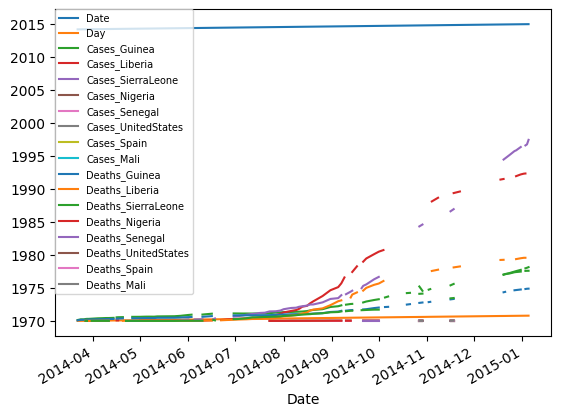

In [162]:
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.0)
plt.show()

In [163]:
ebola = pd.read_csv(
    '/home/sha/books/pandas_for_everyone/data/country_timeseries.csv',
    index_col='Date',
    parse_dates=['Date'],
)
ebola

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [165]:
new_idx = reversed(new_idx)
new_idx

In [166]:
ebola = ebola.reindex(new_idx)
ebola

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-26,4.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [168]:
earliest_date = ebola.index.min()
shift_values = last_valid - earliest_date
shift_values

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [171]:
import pytz
import regex as re

In [174]:
regex = re.compile(r'^Asia')
selected_files = filter(regex.search, pytz.common_timezones)
list(selected_files)

['Asia/Aden',
 'Asia/Almaty',
 'Asia/Amman',
 'Asia/Anadyr',
 'Asia/Aqtau',
 'Asia/Aqtobe',
 'Asia/Ashgabat',
 'Asia/Atyrau',
 'Asia/Baghdad',
 'Asia/Bahrain',
 'Asia/Baku',
 'Asia/Bangkok',
 'Asia/Barnaul',
 'Asia/Beirut',
 'Asia/Bishkek',
 'Asia/Brunei',
 'Asia/Chita',
 'Asia/Choibalsan',
 'Asia/Colombo',
 'Asia/Damascus',
 'Asia/Dhaka',
 'Asia/Dili',
 'Asia/Dubai',
 'Asia/Dushanbe',
 'Asia/Famagusta',
 'Asia/Gaza',
 'Asia/Hebron',
 'Asia/Ho_Chi_Minh',
 'Asia/Hong_Kong',
 'Asia/Hovd',
 'Asia/Irkutsk',
 'Asia/Jakarta',
 'Asia/Jayapura',
 'Asia/Jerusalem',
 'Asia/Kabul',
 'Asia/Kamchatka',
 'Asia/Karachi',
 'Asia/Kathmandu',
 'Asia/Khandyga',
 'Asia/Kolkata',
 'Asia/Krasnoyarsk',
 'Asia/Kuala_Lumpur',
 'Asia/Kuching',
 'Asia/Kuwait',
 'Asia/Macau',
 'Asia/Magadan',
 'Asia/Makassar',
 'Asia/Manila',
 'Asia/Muscat',
 'Asia/Nicosia',
 'Asia/Novokuznetsk',
 'Asia/Novosibirsk',
 'Asia/Omsk',
 'Asia/Oral',
 'Asia/Phnom_Penh',
 'Asia/Pontianak',
 'Asia/Pyongyang',
 'Asia/Qatar',
 'Asia/Qostan

In [175]:
import statsmodels.formula.api as smf

In [176]:
model = smf.ols(formula='tip ~ total_bill', data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           6.69e-34
Time:                        16:07:13   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
results.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

In [178]:
results.conf_int()

,0,1
Intercept,0.605622,1.234918
total_bill,0.090517,0.119532
